In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))


%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt 

['test.csv', 'train.csv', 'gender_submission.csv']
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
df = pd.read_csv("../input/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


class Preprocessor:
    def handle(self, data: pd.DataFrame):
        df_prep = pd.DataFrame()

        # Group the different types of values
        g = data.columns.to_series().groupby(data.dtypes).groups
        for k, cols in g.items():

            # Handle NaN
            df_prep[cols.values] = self.handle_nan(data=data[cols], t=k.name)

            # Handle Categories
            if k.name == 'object':
                df_prep[cols.values] = self.handle_categories(df_prep[cols.values])

        # Scaling
        df_prep, _ = self.handle_scaling(df_prep)

        return df_prep

    def handle_nan(self, data: pd.DataFrame, t: str):
        df = pd.DataFrame()
        if t == 'int64' or t == 'float64':
            df = data.fillna(0.0)
        if t == 'object':
            df = data.fillna('not defined')

        return df

    def handle_categories(self, data: pd.DataFrame):
        return data.stack().rank(method='dense').unstack()

    def handle_scaling(self, data: pd.DataFrame):
        sc = StandardScaler()
        sc_fitted = sc.fit(data)
        fitted = sc_fitted.transform(data)

        return pd.DataFrame(columns=data.columns.values, data=fitted), sc_fitted


In [15]:
X = df.drop('Survived', axis=1)
df_prep = Preprocessor().handle(X)
df_prep.head()

,PassengerId,Pclass,SibSp,Parch,Age,Fare,Name,Sex,Ticket,Cabin,Embarked
0,-1.730108,0.827377,0.432793,-0.473674,-0.102313,-0.502445,-1.424547,0.737695,0.076304,0.536937,0.494702
1,-1.726220,-1.566107,0.432793,-0.473674,0.807492,0.786845,-0.958639,-1.355574,1.879018,-1.821710,-2.071130
2,-1.722332,0.827377,-0.474545,-0.473674,0.125138,-0.488854,-0.276524,-1.355574,2.232282,0.536937,0.494702
3,-1.718444,-1.566107,0.432793,-0.473674,0.636903,0.420730,-0.526227,-1.355574,-0.938525,-1.886195,0.494702
4,-1.714556,0.827377,-0.474545,-0.473674,0.636903,-0.486337,-1.808236,0.737695,-0.032886,0.536937,0.494702


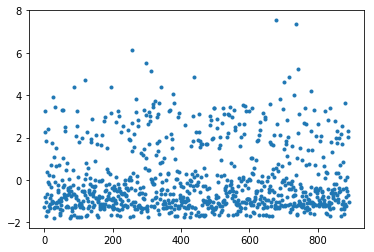

In [19]:
from sklearn.decomposition import PCA

m = PCA(n_components=1)
pca = m.fit_transform(df_prep)

df_pca = pd.DataFrame()
df_pc
plt.plot(df_pca, '.')
